In [127]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required libraries
import pandas as pd
import numpy as np

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# To Scale Data
from sklearn.preprocessing import scale

# To Perform KMeans Clustering
from sklearn.cluster import KMeans

# To Perform Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [129]:
# Importing datasets

df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [130]:
#checking duplicates
sum(df.duplicated(subset = 'country')) == 0
# No duplicate values
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [131]:
# converting percentages into per capita - health, import, export so that the variances are captured better 
# during the PCA

df["exports_1"] = (df["exports"]/100)*df["gdpp"]
df["imports_1"] = (df["imports"]/100)*df["gdpp"]
df["health_1"] = (df["health"]/100)*df["gdpp"]
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


In [132]:
# Dropping extra columns
columns = ['exports', 'imports','health']
df.drop(columns, inplace=True, axis=1)
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


In [133]:
# Reading Data
df.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.618847,6588.352108,1056.733204
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.885795,14710.810418,1801.408906
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920,0.651092,12.821200
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,640.215000,78.535500
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,2045.580000,321.886000
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,7719.600000,976.940000
max,208.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,183750.000000,149100.000000,8663.600000


In [134]:
df.shape

(167, 10)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
exports_1     167 non-null float64
imports_1     167 non-null float64
health_1      167 non-null float64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [136]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

country       0.0
child_mort    0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
exports_1     0.0
imports_1     0.0
health_1      0.0
dtype: float64

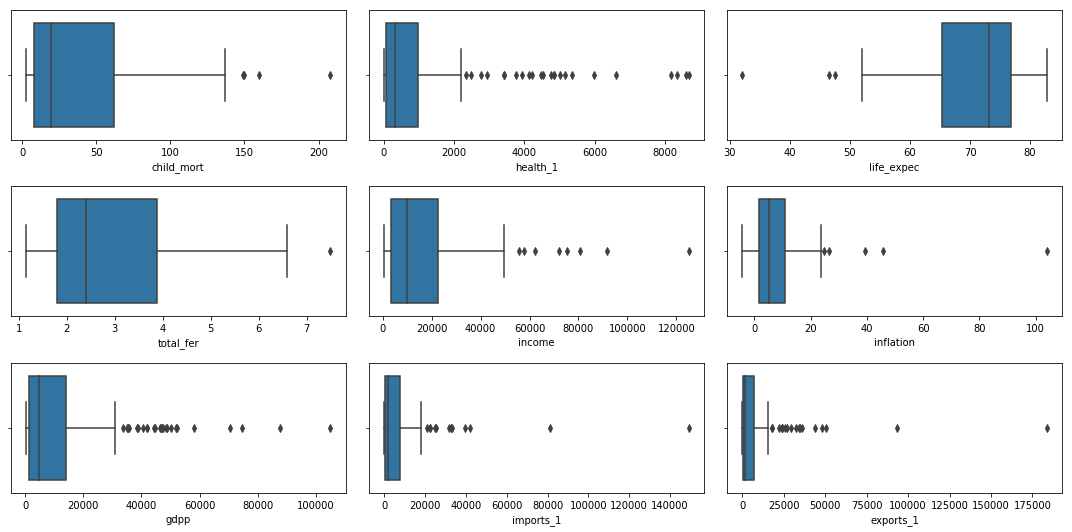

In [138]:
# Checking for outliers in the numerical continuous variables
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health_1'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports_1'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports_1'], ax = axs[2,2])


plt.tight_layout()

# There are substantial outliers that need to be treated before PCA is carried out. 

In [155]:
# Creating a copy of df for outlier treatment
df2 = df.copy()

In [268]:
# Outlier Treatment
# As we can see there are a number of outliers in the data.

# Keeping in mind we need to identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis.

percentiles = df2['child_mort'].quantile([0.05,0.95]).values
df2['child_mort'][df2['child_mort'] <= percentiles[0]] = percentiles[0]
df2['child_mort'][df2['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = df2['health_1'].quantile([0.05,0.95]).values
df2['health_1'][df2['health_1'] <= percentiles[0]] = percentiles[0]
df2['health_1'][df2['health_1'] >= percentiles[1]] = percentiles[1]

percentiles = df2['life_expec'].quantile([0.05,0.95]).values
df2['life_expec'][df2['life_expec'] <= percentiles[0]] = percentiles[0]
df2['life_expec'][df2['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = df2['total_fer'].quantile([0.05,0.95]).values
df2['total_fer'][df2['total_fer'] <= percentiles[0]] = percentiles[0]
df2['total_fer'][df2['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = df2['income'].quantile([0.05,0.95]).values
df2['income'][df2['income'] <= percentiles[0]] = percentiles[0]
df2['income'][df2['income'] >= percentiles[1]] = percentiles[1]

percentiles = df2['inflation'].quantile([0.05,0.95]).values
df2['inflation'][df2['inflation'] <= percentiles[0]] = percentiles[0]
df2['inflation'][df2['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = df2['gdpp'].quantile([0.05,0.95]).values
df2['gdpp'][df2['gdpp'] <= percentiles[0]] = percentiles[0]
df2['gdpp'][df2['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = df2['imports_1'].quantile([0.05,0.95]).values
df2['imports_1'][df2['imports_1'] <= percentiles[0]] = percentiles[0]
df2['imports_1'][df2['imports_1'] >= percentiles[1]] = percentiles[1]

percentiles = df2['exports_1'].quantile([0.05,0.95]).values
df2['exports_1'][df2['exports_1'] <= percentiles[0]] = percentiles[0]
df2['exports_1'][df2['exports_1'] >= percentiles[1]] = percentiles[1]

df2.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,PC1,PC2,PC3,PC4,cluster_labels
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,167.000000
mean,36.808623,15755.491018,7.016075,70.830060,2.922389,12003.719162,5784.478480,5142.509689,954.366191,1.595530e-17,-2.925139e-17,-2.925139e-17,2.758937e-17,0.784431
std,36.193830,14770.353771,6.271398,8.039216,1.438264,15154.443890,8579.136537,6694.383178,1453.198372,2.490570e+00,1.154766e+00,9.277816e-01,5.335573e-01,0.695249
min,3.460000,1213.000000,0.183400,55.780000,1.390000,465.900000,70.468800,169.281000,26.715920,-3.642815e+00,-1.945908e+00,-1.723238e+00,-2.105177e+00,0.000000
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,640.215000,78.535500,-1.826595e+00,-9.463992e-01,-5.601063e-01,-1.989849e-01,0.000000
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,2045.580000,321.886000,-5.080875e-01,-2.794347e-01,-2.366231e-01,-1.836413e-02,1.000000
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,7719.600000,976.940000,1.176821e+00,9.367690e-01,4.523581e-01,1.499625e-01,1.000000
max,116.000000,48290.000000,20.870000,81.400000,5.861000,48610.000000,31385.100000,24241.560000,4966.701000,6.029246e+00,3.501674e+00,2.360969e+00,2.250684e+00,2.000000


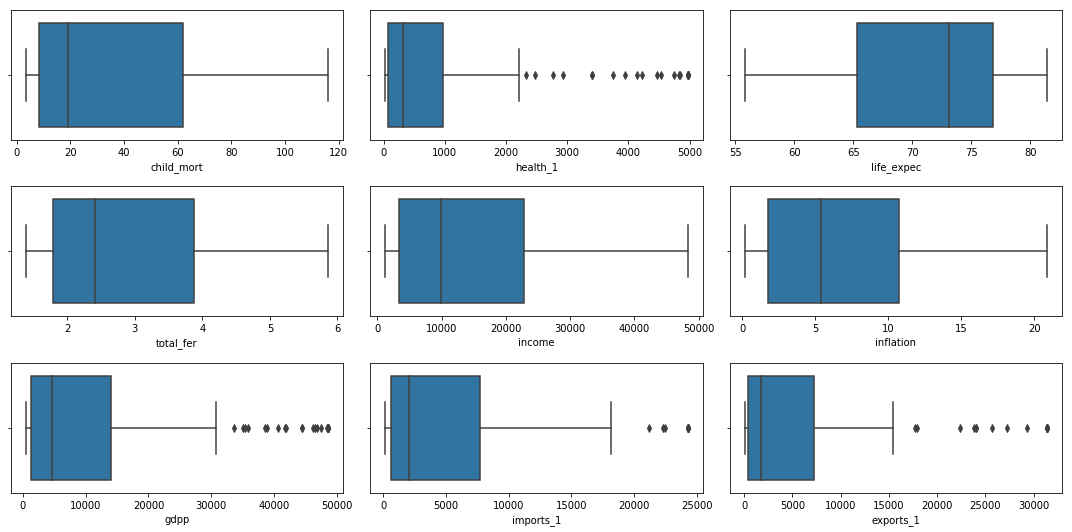

In [269]:
# Plot showing impact of outlier treatment

fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(df2['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df2['health_1'], ax = axs[0,1])
plt3 = sns.boxplot(df2['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df2['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df2['income'], ax = axs[1,1])
plt6 = sns.boxplot(df2['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df2['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df2['imports_1'], ax = axs[2,1])
plt9 = sns.boxplot(df2['exports_1'], ax = axs[2,2])

plt.tight_layout()

In [159]:
# # Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports_1', 'health_1', 'imports_1', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
df2[varlist] = scaler.fit_transform(df2[varlist])

In [160]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [165]:
# Putting feature variable to X
X = df2.drop(['country'],axis=1)

# Putting response variable to y
y = df2['country']

X.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1
0,1.479611,-0.963751,0.387922,-1.829058,2.021935,-0.758089,-0.671776,-0.738139,-0.630757
1,-0.560119,-0.395220,-0.404189,0.682689,-0.887524,-0.523860,-0.544868,-0.474209,-0.474216
2,-0.263582,-0.192271,1.453672,0.707681,-0.022361,-0.499357,-0.477735,-0.563322,-0.530960
3,2.194625,-0.670602,2.213618,-1.341704,2.046146,-0.560944,-0.420173,-0.546035,-0.590102
4,-0.734715,0.231394,-0.892257,0.745170,-0.552623,0.013206,-0.023628,0.314504,-0.150184


In [166]:
# Performing the PCA on the data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [167]:
pca.components_

array([[-0.31367429,  0.37606989, -0.17392029,  0.34317857, -0.29814249,
         0.37571932,  0.35088556,  0.36846006,  0.35103082],
       [ 0.48692021,  0.16792399,  0.20087988, -0.34381683,  0.51883223,
         0.25824285,  0.33028515,  0.26763202,  0.24404112],
       [-0.17802044,  0.16893519,  0.93799123,  0.15392553, -0.10525343,
        -0.00429884,  0.06950534, -0.04169079, -0.13631993],
       [ 0.02153866,  0.01051309,  0.10703522,  0.18472506,  0.1521402 ,
         0.2801033 , -0.53642953, -0.38197055,  0.64697993],
       [ 0.1296933 ,  0.07152969,  0.07992819, -0.67240223, -0.6803952 ,
         0.07977127, -0.08450297, -0.04344617,  0.20302828],
       [ 0.11174337,  0.75179736, -0.16957488, -0.03552738,  0.05693033,
         0.22494329, -0.12580359, -0.38334088, -0.41914078],
       [-0.77435564,  0.06162714, -0.02507574, -0.50261149,  0.37275861,
         0.0364318 , -0.04126796,  0.00307287,  0.03660048],
       [-0.05561451, -0.43371874, -0.01099551, -0.01105637, -0

In [168]:
# checking the variance ratios
pca.explained_variance_ratio_

array([0.68603711, 0.14681216, 0.09505246, 0.03125469, 0.01630959,
       0.0116265 , 0.00891916, 0.00258175, 0.00140659])

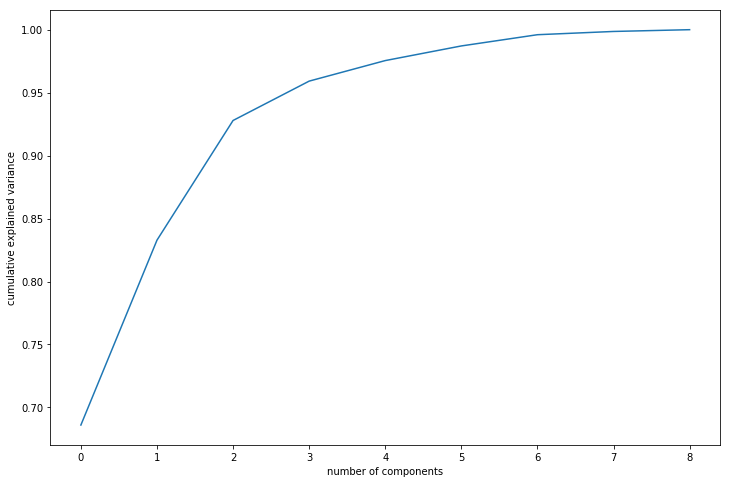

In [169]:
# Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [21]:
# Around 96% of the information is being explained by 4 components

In [170]:
# Understanding how the 9 original variables are loaded onto principal components
colnames = list(num_df.columns)
pcs_df = pd.DataFrame ({'Feature':colnames, 'PC1':pca.components_[0], 'PC2':pca.components_[1], 
                        'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.313674,0.486920,-0.178020,0.021539
1,exports_1,0.376070,0.167924,0.168935,0.010513
2,health_1,-0.173920,0.200880,0.937991,0.107035
3,imports_1,0.343179,-0.343817,0.153926,0.184725
4,income,-0.298142,0.518832,-0.105253,0.152140
5,inflation,0.375719,0.258243,-0.004299,0.280103
6,life_expec,0.350886,0.330285,0.069505,-0.536430
7,total_fer,0.368460,0.267632,-0.041691,-0.381971
8,gdpp,0.351031,0.244041,-0.136320,0.646980


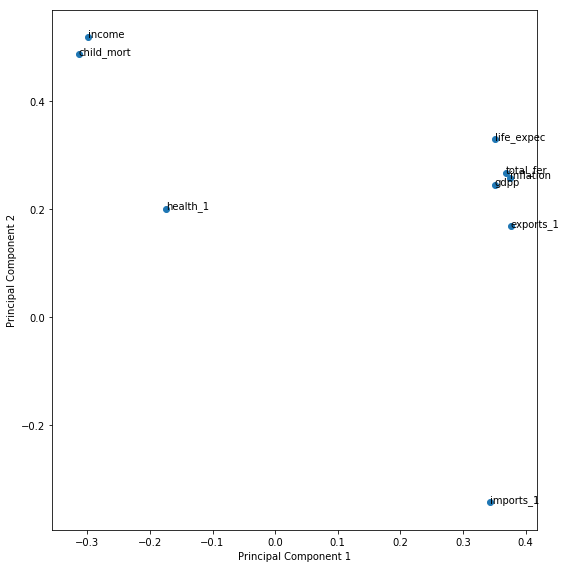

In [172]:
# Plotting to see how variables are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

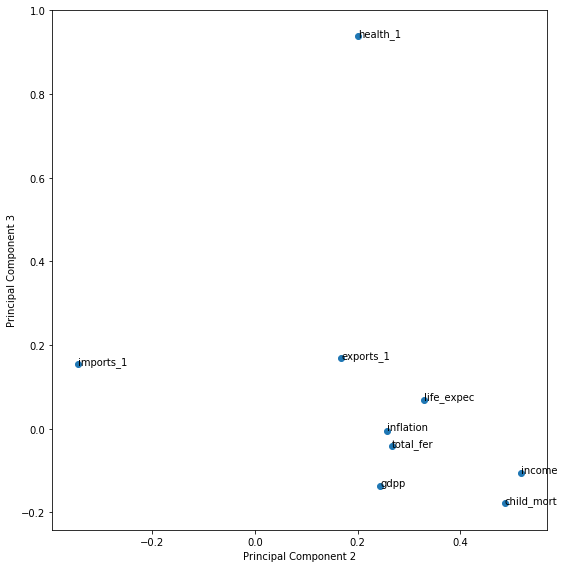

In [173]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC2, pcs_df.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC2[i],pcs_df.PC3[i]))
plt.tight_layout()
plt.show()

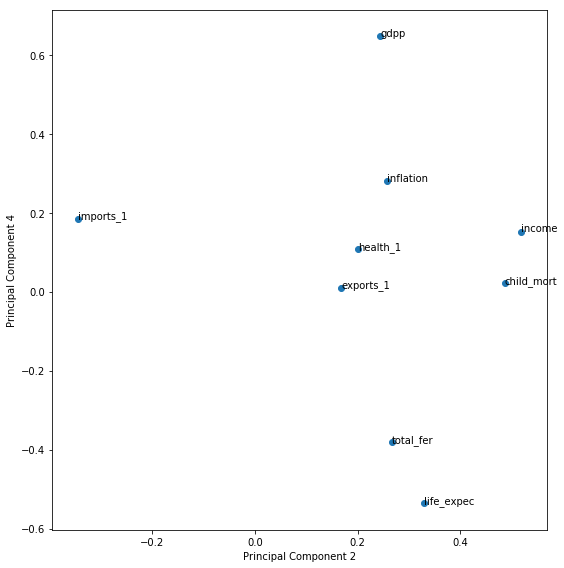

In [174]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC2, pcs_df.PC4)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC2[i],pcs_df.PC4[i]))
plt.tight_layout()
plt.show()

In [175]:
# Dimensionality reduction using PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [207]:
# Basis transformation - getting the data onto our PCs
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [208]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-3.138430,1.545122,-0.482386,0.053271
1,-0.132973,-1.673458,-0.099816,-0.043625
2,-0.742161,-0.691475,1.552622,0.277988
3,-3.162657,2.349490,1.225607,0.245117
4,0.952962,-0.998515,-0.488791,-0.252088


In [209]:
# Creating correlation matrix for the principal components - we expect little to no correlation
corrmat = np.corrcoef(df_pca.transpose())

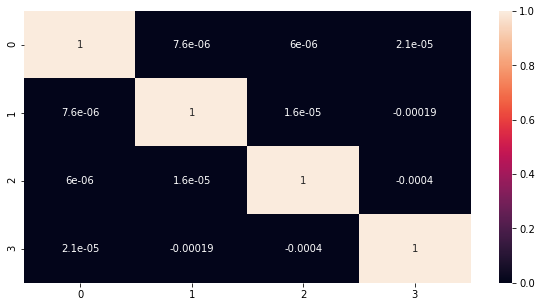

In [210]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [177]:
# Creating a transpose
pc = np.transpose(df_pca)

In [178]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,-3.131872,1.546674,-0.481267,0.055881
1,-0.131785,-1.671799,-0.100328,-0.049290
2,-0.741069,-0.691548,1.551504,0.272454
3,-3.160909,2.351136,1.228481,0.249862
4,0.946293,-1.001889,-0.489047,-0.249619


In [179]:
pcs_df2.shape

(167, 4)

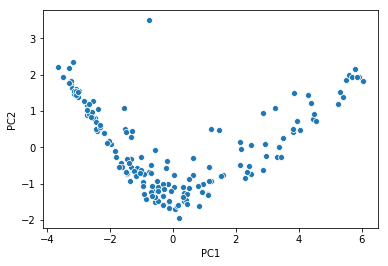

In [271]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that we can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2', data=pcs_df2)

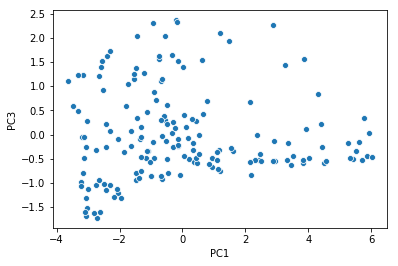

In [212]:
sns.scatterplot(x='PC1',y='PC3',data=pcs_df2)

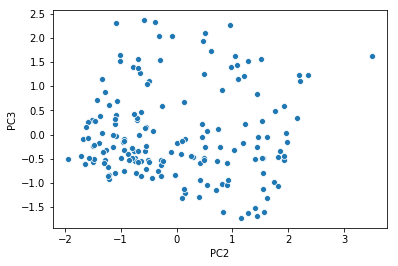

In [182]:
sns.scatterplot(x='PC2',y='PC3',data=pcs_df2)

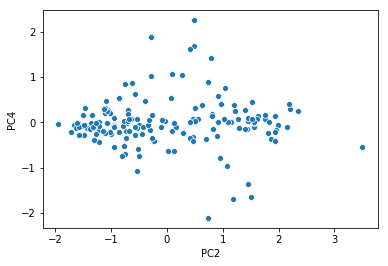

In [184]:
sns.scatterplot(x='PC2',y='PC4',data=pcs_df2)

In [ ]:
# KMeans Clustering

In [185]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [186]:
# Checking the Hopkins measure
hopkins(pcs_df2)

0.8252791015182004

In [36]:
#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [187]:
dat3_1 = pcs_df2

In [272]:
# KMeans Clustering
# Performing the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

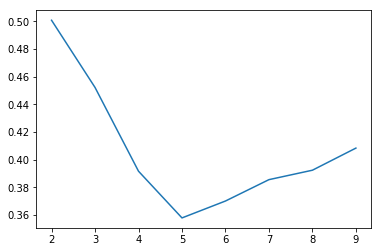

In [273]:
# Plotting the Elbow Curve
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

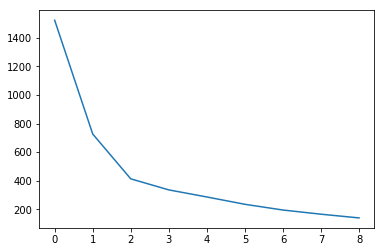

In [274]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [192]:
#Here also we're seeing a distinct bend at around 2 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=10000,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [193]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,ClusterID
0,-3.131872,1.546674,-0.481267,0.055881,1
1,-0.131785,-1.671799,-0.100328,-0.049290,1
2,-0.741069,-0.691548,1.551504,0.272454,1
3,-3.160909,2.351136,1.228481,0.249862,1
4,0.946293,-1.001889,-0.489047,-0.249619,1
5,-0.210514,-0.575144,2.360969,0.634833,1
6,-0.556177,-1.515116,0.298101,-0.073330,1
7,4.031534,0.486452,-0.491342,1.689436,0
8,5.420098,1.397140,-0.499150,0.276150,0
9,-0.694705,-0.501497,1.112395,-0.047612,1


In [275]:
dat_km['ClusterID'].value_counts()

1    127
0     40
Name: ClusterID, dtype: int64

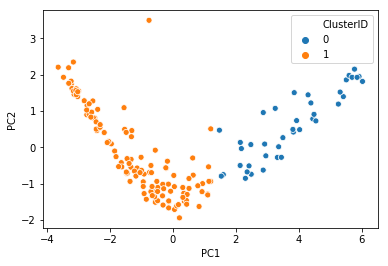

In [101]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

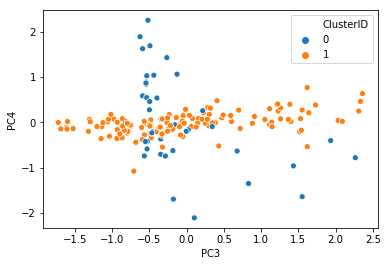

In [195]:
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',legend='full',data=dat_km)

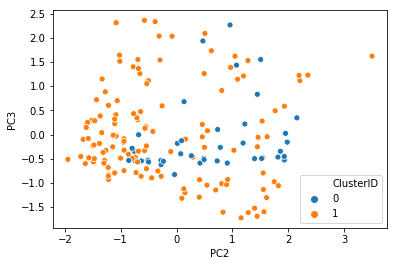

In [196]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',legend='full',data=dat_km)

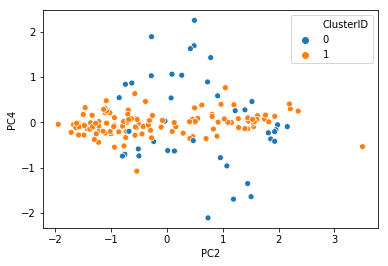

In [197]:
sns.scatterplot(x='PC2',y='PC4',hue='ClusterID',legend='full',data=dat_km)

In [200]:
dat5=pd.merge(df, dat_km, left_index=True, right_index=True)
dat5.head(20)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,1610,9.440,56.2,5.82,553,55.300,248.297,41.9174,-3.131872,1.546674,-0.481267,0.055881,1
1,Albania,16.6,9930,4.490,76.3,1.65,4090,1145.200,1987.740,267.8950,-0.131785,-1.671799,-0.100328,-0.049290,1
2,Algeria,27.3,12900,16.100,76.5,2.89,4460,1712.640,1400.440,185.9820,-0.741069,-0.691548,1.551504,0.272454,1
3,Angola,119.0,5900,22.400,60.1,6.16,3530,2199.190,1514.370,100.6050,-3.160909,2.351136,1.228481,0.249862,1
4,Antigua and Barbuda,10.3,19100,1.440,76.8,2.13,12200,5551.000,7185.800,735.6600,0.946293,-1.001889,-0.489047,-0.249619,1
5,Argentina,14.5,18700,20.900,75.8,2.37,10300,1946.700,1648.000,834.3000,-0.210514,-0.575144,2.360969,0.634833,1
6,Armenia,18.1,6700,7.770,73.3,1.69,3220,669.760,1458.660,141.6800,-0.556177,-1.515116,0.298101,-0.073330,1
7,Australia,4.8,41400,1.160,82.0,1.93,51900,10276.200,10847.100,4530.8700,4.031534,0.486452,-0.491342,1.689436,0
8,Austria,4.3,43200,0.873,80.5,1.44,46900,24059.700,22418.200,5159.0000,5.420098,1.397140,-0.499150,0.276150,0
9,Azerbaijan,39.2,16000,13.800,69.1,1.92,5840,3171.120,1208.880,343.3920,-0.694705,-0.501497,1.112395,-0.047612,1


In [232]:
x_cluster_sort = dat5.sort_values('ClusterID')

cluster1 = x_cluster_sort.loc[x_cluster_sort["ClusterID"] == 0]
cluster2 = x_cluster_sort.loc[x_cluster_sort["ClusterID"] == 1]

c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())

summary = pd.concat([c1means, c2means], axis=1, join_axes = [c1means.index])
summary.columns = ['Cluster_1', 'Cluster_2']
print(summary)
summary1 = pd.DataFrame(summary)
summary1

               Cluster_1    Cluster_2
child_mort      5.400000    48.622835
income      43935.000000  8706.795276
inflation       2.886050     9.323811
life_expec     79.625000    67.699213
total_fer       1.770750     3.318740
gdpp        40120.000000  4411.133858
exports_1   25067.437500  1862.565729
imports_1   21268.022500  1964.833875
health_1     3527.677750   278.482954
PC1             3.742972    -1.178889
PC2             0.581368    -0.183108
PC3            -0.094938     0.029902
PC4             0.055191    -0.017383
ClusterID       0.000000     1.000000


,Cluster_1,Cluster_2
child_mort,5.400000,48.622835
income,43935.000000,8706.795276
inflation,2.886050,9.323811
life_expec,79.625000,67.699213
total_fer,1.770750,3.318740
gdpp,40120.000000,4411.133858
exports_1,25067.437500,1862.565729
imports_1,21268.022500,1964.833875
health_1,3527.677750,278.482954
PC1,3.742972,-1.178889


In [103]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4'],axis=1)
dat6.head(10)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,ClusterID
0,Afghanistan,90.2,1610,9.440,56.2,5.82,553,55.30,248.297,41.9174,1
1,Albania,16.6,9930,4.490,76.3,1.65,4090,1145.20,1987.740,267.8950,1
2,Algeria,27.3,12900,16.100,76.5,2.89,4460,1712.64,1400.440,185.9820,1
3,Angola,119.0,5900,22.400,60.1,6.16,3530,2199.19,1514.370,100.6050,1
4,Antigua and Barbuda,10.3,19100,1.440,76.8,2.13,12200,5551.00,7185.800,735.6600,1
5,Argentina,14.5,18700,20.900,75.8,2.37,10300,1946.70,1648.000,834.3000,1
6,Armenia,18.1,6700,7.770,73.3,1.69,3220,669.76,1458.660,141.6800,1
7,Australia,4.8,41400,1.160,82.0,1.93,51900,10276.20,10847.100,4530.8700,0
8,Austria,4.3,43200,0.873,80.5,1.44,46900,24059.70,22418.200,5159.0000,0
9,Azerbaijan,39.2,16000,13.800,69.1,1.92,5840,3171.12,1208.880,343.3920,1


In [ ]:
#Let's say my problem statement here is to find the target countries that fare poorly in terms of gdpp,income and child mortality 
#So we can choose those cluster means as cut offs and find the final list of countries.

In [104]:
#Using the concept of binning
x=df[df['gdpp']<=4411.133858]
y=x[x['income']<=8706.795276]
fin = y[y['child_mort']>=48.622835]

In [267]:
fin

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,PC1,PC2,PC3,PC4,cluster_labels
0,Afghanistan,90.2,1610,9.440,56.2,5.82,553,55.30000,248.297000,41.9174,-3.131872,1.546674,-0.481267,0.055881,0
3,Angola,119.0,5900,22.400,60.1,6.16,3530,2199.19000,1514.370000,100.6050,-3.160909,2.351136,1.228481,0.249862,0
12,Bangladesh,49.4,2440,7.140,70.4,2.33,758,121.28000,165.244000,26.6816,-1.359523,-0.939914,-0.087806,-0.052694,0
17,Benin,111.0,1820,0.885,61.8,5.36,758,180.40400,281.976000,31.0780,-2.725258,1.155233,-1.723238,-0.002303,0
25,Burkina Faso,116.0,1430,6.810,57.9,5.87,575,110.40000,170.200000,38.7550,-3.226329,1.748242,-0.975226,0.074182,0
26,Burundi,93.6,764,12.300,57.7,6.26,231,20.60520,90.552000,26.7960,-3.205676,1.622701,-0.046556,0.147264,0
28,Cameroon,108.0,2660,1.910,57.3,5.11,1310,290.82000,353.700000,67.2030,-2.815863,1.283708,-1.614946,-0.114661,0
31,Central African Republic,149.0,888,2.010,47.5,5.21,446,52.62800,118.190000,17.7508,-3.061023,1.442900,-1.689258,-0.143477,0
32,Chad,150.0,1930,6.390,56.5,6.59,897,330.09600,390.195000,40.6341,-3.232173,1.824004,-1.058799,0.011662,0
36,Comoros,88.2,1410,3.870,65.9,4.75,769,126.88500,397.573000,34.6819,-2.312895,0.545096,-1.046751,0.069488,0


In [122]:
fin.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,93.786667,2275.844444,11.636778,59.862222,4.962444,1000.355556,294.921065,398.919202,57.012407
std,32.982562,1337.273209,15.664091,6.943188,1.151047,754.845142,459.861055,352.916987,52.000414
min,49.400000,609.000000,0.885000,32.100000,2.330000,231.000000,1.076920,0.651092,12.821200
25%,64.400000,1390.000000,4.150000,56.800000,4.510000,547.000000,101.286000,170.868000,31.078000
50%,90.200000,1850.000000,8.790000,60.400000,5.060000,758.000000,137.274000,279.936000,44.132400
75%,111.000000,3060.000000,14.000000,64.600000,5.710000,1220.000000,305.100000,432.468000,64.660000
max,208.000000,5900.000000,104.000000,71.100000,7.490000,3600.000000,2331.740000,1514.370000,328.320000


In [266]:
print ((fin['country']).to_string(index=False))
# About 45 countries fall in the category of socio-economically struggling countries taking into account gdpp, 
income and child mortality rates.

Afghanistan
                  Angola
              Bangladesh
                   Benin
            Burkina Faso
                 Burundi
                Cameroon
Central African Republic
                    Chad
                 Comoros
        Congo, Dem. Rep.
             Congo, Rep.
           Cote d'Ivoire
                 Eritrea
                  Gambia
                   Ghana
                  Guinea
           Guinea-Bissau
                   Haiti
                   India
                   Kenya
                Kiribati
                     Lao
                 Lesotho
                 Liberia
              Madagascar
                  Malawi
                    Mali
              Mauritania
              Mozambique
                 Myanmar
                   Niger
                 Nigeria
                Pakistan
                  Rwanda
                 Senegal
            Sierra Leone
                   Sudan
              Tajikistan
                Tanzania
             

In [ ]:
# Hierarchical Clustering

In [106]:
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,-3.131872,1.546674,-0.481267,0.055881
1,-0.131785,-1.671799,-0.100328,-0.049290
2,-0.741069,-0.691548,1.551504,0.272454
3,-3.160909,2.351136,1.228481,0.249862
4,0.946293,-1.001889,-0.489047,-0.249619


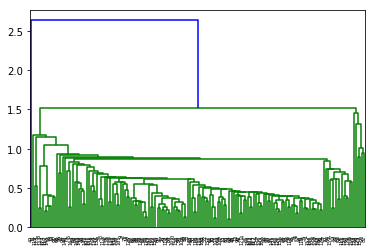

In [107]:
# single linkage
mergings = linkage(pcs_df2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

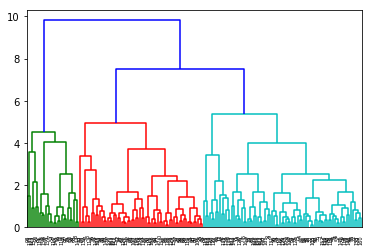

In [108]:
# complete linkage
mergings = linkage(pcs_df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [109]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0])

In [242]:
# assign cluster labels
pcs_df2['cluster_labels'] = cluster_labels
pcs_df2.head(10)

,PC1,PC2,PC3,PC4,cluster_labels
0,-3.131872,1.546674,-0.481267,0.055881,0
1,-0.131785,-1.671799,-0.100328,-0.049290,1
2,-0.741069,-0.691548,1.551504,0.272454,1
3,-3.160909,2.351136,1.228481,0.249862,0
4,0.946293,-1.001889,-0.489047,-0.249619,1
5,-0.210514,-0.575144,2.360969,0.634833,1
6,-0.556177,-1.515116,0.298101,-0.073330,1
7,4.031534,0.486452,-0.491342,1.689436,2
8,5.420098,1.397140,-0.499150,0.276150,2
9,-0.694705,-0.501497,1.112395,-0.047612,1


In [243]:
df2=pd.merge(df, pcs_df2, left_index=True, right_index=True)
df2.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,PC1,PC2,PC3,PC4,cluster_labels
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174,-3.131872,1.546674,-0.481267,0.055881,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,-0.131785,-1.671799,-0.100328,-0.049290,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,-0.741069,-0.691548,1.551504,0.272454,1
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,-3.160909,2.351136,1.228481,0.249862,0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,0.946293,-1.001889,-0.489047,-0.249619,1


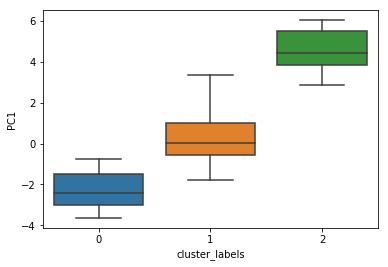

In [244]:
# plots
sns.boxplot(x='cluster_labels', y='PC1', data=df2)

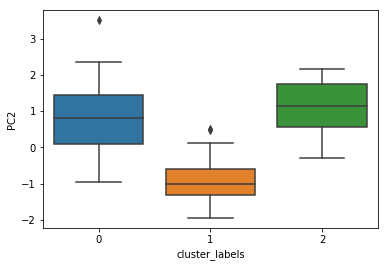

In [245]:
sns.boxplot(x='cluster_labels', y='PC2', data=df2)

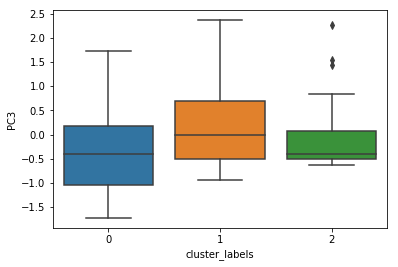

In [246]:
sns.boxplot(x='cluster_labels', y='PC3', data=df2)

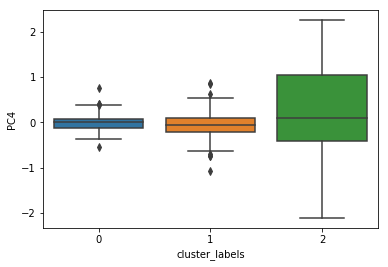

In [247]:
sns.boxplot(x='cluster_labels', y='PC4', data=df2)

In [248]:
x_cluster_sort = df2.sort_values('cluster_labels')

cluster1 = x_cluster_sort.loc[x_cluster_sort['cluster_labels'] == 0]
cluster2 = x_cluster_sort.loc[x_cluster_sort['cluster_labels'] == 1]
cluster3 = x_cluster_sort.loc[x_cluster_sort['cluster_labels'] == 2]

c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())

summary = pd.concat([c1means, c2means, c3means], axis=1, join_axes = [c1means.index])
summary.columns = ['Cluster_1', 'Cluster_2','Cluster_3' ]
print(summary)

                  Cluster_1     Cluster_2     Cluster_3
child_mort        79.895161     16.502532      5.150000
income          4172.467742  16023.670886  51484.615385
inflation         10.281532      7.340127      3.163115
life_expec        61.191935     74.636709     80.484615
total_fer          4.550323      2.071899      1.788846
gdpp            2042.322581   9527.721519  49450.000000
exports_1        903.375999   4271.562476  32530.023077
imports_1        945.356550   4362.955646  26806.507692
health_1         120.293624    666.116587   4476.655000
PC1               -2.260885      0.288694      4.514155
PC2                0.721084     -0.924105      1.088349
PC3               -0.284945      0.237367     -0.041746
PC4               -0.003386     -0.053442      0.170457
cluster_labels     0.000000      1.000000      2.000000


In [249]:
df2[df2['cluster_labels'] ==1]

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,PC1,PC2,PC3,PC4,cluster_labels
1,Albania,16.6,9930,4.490,76.3,1.65,4090,1145.2000,1987.740,267.8950,-0.131785,-1.671799,-0.100328,-0.049290,1
2,Algeria,27.3,12900,16.100,76.5,2.89,4460,1712.6400,1400.440,185.9820,-0.741069,-0.691548,1.551504,0.272454,1
4,Antigua and Barbuda,10.3,19100,1.440,76.8,2.13,12200,5551.0000,7185.800,735.6600,0.946293,-1.001889,-0.489047,-0.249619,1
5,Argentina,14.5,18700,20.900,75.8,2.37,10300,1946.7000,1648.000,834.3000,-0.210514,-0.575144,2.360969,0.634833,1
6,Armenia,18.1,6700,7.770,73.3,1.69,3220,669.7600,1458.660,141.6800,-0.556177,-1.515116,0.298101,-0.073330,1
9,Azerbaijan,39.2,16000,13.800,69.1,1.92,5840,3171.1200,1208.880,343.3920,-0.694705,-0.501497,1.112395,-0.047612,1
10,Bahamas,13.8,22900,-0.393,73.8,1.86,28000,9800.0000,12236.000,2209.2000,2.178924,-0.035173,-0.828544,0.028066,1
11,Bahrain,8.6,41100,7.440,76.0,2.16,20700,14386.5000,10536.300,1028.7900,2.145070,0.134635,0.678810,-0.631132,1
13,Barbados,14.2,15300,0.321,76.7,1.78,16000,6320.0000,7792.000,1275.2000,1.205353,-0.940915,-0.746533,-0.074940,1
14,Belarus,5.5,16200,15.100,70.4,1.49,6030,3099.4200,3889.350,338.2830,-0.139209,-1.015853,1.515075,-0.203724,1


In [250]:
df2[df2['cluster_labels'] ==0]

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,PC1,PC2,PC3,PC4,cluster_labels
0,Afghanistan,90.2,1610,9.440,56.2,5.82,553,55.30000,248.297000,41.9174,-3.131872,1.546674,-0.481267,0.055881,0
3,Angola,119.0,5900,22.400,60.1,6.16,3530,2199.19000,1514.370000,100.6050,-3.160909,2.351136,1.228481,0.249862,0
12,Bangladesh,49.4,2440,7.140,70.4,2.33,758,121.28000,165.244000,26.6816,-1.359523,-0.939914,-0.087806,-0.052694,0
17,Benin,111.0,1820,0.885,61.8,5.36,758,180.40400,281.976000,31.0780,-2.725258,1.155233,-1.723238,-0.002303,0
18,Bhutan,42.7,6420,5.990,72.1,2.38,2180,926.50000,1541.260000,113.3600,-0.940190,-0.951884,-0.162771,-0.092593,0
21,Botswana,52.5,13300,8.920,57.1,2.88,6350,2768.60000,3257.550000,527.0500,-1.302852,0.461057,-0.048458,-0.312677,0
25,Burkina Faso,116.0,1430,6.810,57.9,5.87,575,110.40000,170.200000,38.7550,-3.226329,1.748242,-0.975226,0.074182,0
26,Burundi,93.6,764,12.300,57.7,6.26,231,20.60520,90.552000,26.7960,-3.205676,1.622701,-0.046556,0.147264,0
27,Cambodia,44.4,2520,3.120,66.1,2.88,786,425.22600,467.670000,44.6448,-1.466527,-0.724390,-0.787760,-0.198919,0
28,Cameroon,108.0,2660,1.910,57.3,5.11,1310,290.82000,353.700000,67.2030,-2.815863,1.283708,-1.614946,-0.114661,0


In [251]:
df2[df2['cluster_labels'] ==2]

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,PC1,PC2,PC3,PC4,cluster_labels
7,Australia,4.8,41400,1.160,82.0,1.93,51900,10276.2,10847.1,4530.87,4.031534,0.486452,-0.491342,1.689436,2
8,Austria,4.3,43200,0.873,80.5,1.44,46900,24059.7,22418.2,5159.00,5.420098,1.397140,-0.499150,0.276150,2
15,Belgium,4.5,41100,1.880,80.0,1.86,44400,33921.6,33166.8,4750.80,5.514531,1.859236,-0.346989,-0.365957,2
23,Brunei,10.5,80600,16.700,77.1,1.84,35300,23792.2,9884.0,1002.52,2.874742,0.957689,2.265007,-0.779207,2
29,Canada,5.6,40700,2.870,81.3,1.63,47400,13793.4,14694.0,5356.20,4.449301,0.784171,-0.265222,1.428100,2
44,Denmark,4.1,44000,3.220,79.5,1.87,58000,29290.0,25288.0,6612.00,5.602452,1.981959,-0.158006,-0.053574,2
53,Finland,3.0,39800,0.351,80.0,1.87,46200,17879.4,17278.8,4134.90,4.488196,0.908799,-0.590911,0.585404,2
54,France,4.2,36900,1.050,81.4,2.03,40600,10880.8,11408.6,4831.40,3.833474,0.419962,-0.590692,1.625307,2
58,Germany,4.2,40400,0.758,80.1,1.39,41800,17681.4,15507.8,4848.80,4.547554,0.727407,-0.546020,0.891771,2
68,Iceland,2.6,38800,5.470,82.0,2.20,41900,22374.6,18142.7,3938.60,4.388993,1.222848,0.216618,0.256837,2


In [254]:
# Using the concept of binning
a=df2[df2['gdpp']<=4411.133858]
b=a[a['income']<=8706.795276]
fin2 = b[b['child_mort']>=48.622835]

In [255]:
fin2

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,PC1,PC2,PC3,PC4,cluster_labels
0,Afghanistan,90.2,1610,9.440,56.2,5.82,553,55.30000,248.297000,41.9174,-3.131872,1.546674,-0.481267,0.055881,0
3,Angola,119.0,5900,22.400,60.1,6.16,3530,2199.19000,1514.370000,100.6050,-3.160909,2.351136,1.228481,0.249862,0
12,Bangladesh,49.4,2440,7.140,70.4,2.33,758,121.28000,165.244000,26.6816,-1.359523,-0.939914,-0.087806,-0.052694,0
17,Benin,111.0,1820,0.885,61.8,5.36,758,180.40400,281.976000,31.0780,-2.725258,1.155233,-1.723238,-0.002303,0
25,Burkina Faso,116.0,1430,6.810,57.9,5.87,575,110.40000,170.200000,38.7550,-3.226329,1.748242,-0.975226,0.074182,0
26,Burundi,93.6,764,12.300,57.7,6.26,231,20.60520,90.552000,26.7960,-3.205676,1.622701,-0.046556,0.147264,0
28,Cameroon,108.0,2660,1.910,57.3,5.11,1310,290.82000,353.700000,67.2030,-2.815863,1.283708,-1.614946,-0.114661,0
31,Central African Republic,149.0,888,2.010,47.5,5.21,446,52.62800,118.190000,17.7508,-3.061023,1.442900,-1.689258,-0.143477,0
32,Chad,150.0,1930,6.390,56.5,6.59,897,330.09600,390.195000,40.6341,-3.232173,1.824004,-1.058799,0.011662,0
36,Comoros,88.2,1410,3.870,65.9,4.75,769,126.88500,397.573000,34.6819,-2.312895,0.545096,-1.046751,0.069488,0


In [256]:
fin2.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_1,imports_1,health_1,PC1,PC2,PC3,PC4,cluster_labels
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,93.786667,2275.844444,11.636778,59.862222,4.962444,1000.355556,294.921065,398.919202,57.012407,-2.660385,1.003229,-0.283250,0.058598,0.022222
std,32.982562,1337.273209,15.664091,6.943188,1.151047,754.845142,459.861055,352.916987,52.000414,0.532629,0.754737,1.039262,0.201497,0.149071
min,49.400000,609.000000,0.885000,32.100000,2.330000,231.000000,1.076920,0.651092,12.821200,-3.642815,-0.939914,-1.723238,-0.357567,0.000000
25%,64.400000,1390.000000,4.150000,56.800000,4.510000,547.000000,101.286000,170.868000,31.078000,-3.081782,0.545096,-1.136606,-0.091325,0.000000
50%,90.200000,1850.000000,8.790000,60.400000,5.060000,758.000000,137.274000,279.936000,44.132400,-2.660524,1.046479,-0.264080,0.055881,0.000000
75%,111.000000,3060.000000,14.000000,64.600000,5.710000,1220.000000,305.100000,432.468000,64.660000,-2.313164,1.550650,0.490407,0.133201,0.000000
max,208.000000,5900.000000,104.000000,71.100000,7.490000,3600.000000,2331.740000,1514.370000,328.320000,-1.359523,2.351136,1.731042,0.765220,1.000000


In [265]:
print ((fin2['country']).to_string(index=False))

Afghanistan
                  Angola
              Bangladesh
                   Benin
            Burkina Faso
                 Burundi
                Cameroon
Central African Republic
                    Chad
                 Comoros
        Congo, Dem. Rep.
             Congo, Rep.
           Cote d'Ivoire
                 Eritrea
                  Gambia
                   Ghana
                  Guinea
           Guinea-Bissau
                   Haiti
                   India
                   Kenya
                Kiribati
                     Lao
                 Lesotho
                 Liberia
              Madagascar
                  Malawi
                    Mali
              Mauritania
              Mozambique
                 Myanmar
                   Niger
                 Nigeria
                Pakistan
                  Rwanda
                 Senegal
            Sierra Leone
                   Sudan
              Tajikistan
                Tanzania
             

In [ ]:
# Hierarchical Clustering also throws up 45 countries as fit cases for aid money. 
# All these belong to category 0 countries
# These are:
  Afghanistan, 
    Angola
              Bangladesh
                   Benin
            Burkina Faso
                 Burundi
                Cameroon
Central African Republic
                    Chad
                 Comoros
        Congo, Dem. Rep.
             Congo, Rep.
           Cote d'Ivoire
                 Eritrea
                  Gambia
                   Ghana
                  Guinea
           Guinea-Bissau
                   Haiti
                   India
                   Kenya
                Kiribati
                     Lao
                 Lesotho
                 Liberia
              Madagascar
                  Malawi
                    Mali
              Mauritania
              Mozambique
                 Myanmar
                   Niger
                 Nigeria
                Pakistan
                  Rwanda
                 Senegal
            Sierra Leone
                   Sudan
              Tajikistan
                Tanzania
             Timor-Leste
                    Togo
                  Uganda
                   Yemen
                  Zambia